In [39]:
from datasets import import_synthetic
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import synthetic data
X, y = import_synthetic()

100%|██████████| 1200/1200 [00:27<00:00, 43.02it/s]


In [44]:
# Get dataset length
len(X)

1200

In [69]:
# Set dataset number
DSN = 235

In [70]:
X[DSN].head()

,case,step,susceptible,c_infected,recovered,dead
77031,BA-8-100010,0,993,7,0,0
77032,BA-8-100010,1,993,7,0,0
77033,BA-8-100010,2,993,7,0,0
77034,BA-8-100010,3,993,7,0,0
77035,BA-8-100010,4,993,7,0,0


In [71]:
y.iloc[DSN]

case                BA-8-100010
population                 1000
initial_infected              7
infectiousness         0.121361
i_out                  0.487875
i_rec_prop              0.84116
network                      BA
k                             8
Name: 235, dtype: object

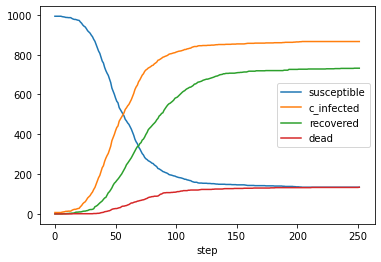

In [72]:
# Plot time series data
ax_x = 'step'
ax_y = ['susceptible', 'c_infected', 'recovered', 'dead']
df = X[DSN][[ax_x] + ax_y]
df.plot(x=ax_x)
plt.show()